In [2]:
import jax
import jax.numpy as jnp
from scipy.integrate import quad
import integration
import numpy as np

def igv(t, a, b, z):

    x = (a * jnp.cos(t))**2 + (z + b * jnp.sin(t))**2
    return a * (b + jnp.sin(t) * z) * (
        1 - (1 - x) ** 1.5
    ) / (3 * x)

def igv_circ(t, r, z):

    x = z**2 + r**2 + 2 * r * z * jnp.sin(t)
    return r * (r + jnp.sin(t) * z) * (
        1 - (1 - x) ** 1.5
    ) / (3 * x)

def igv_const(t, a, b, z):

    return 0.5 * a * (b + z * jnp.sin(t))

def igv_quad(t, a, b, z):

    return 0.25 * a * (b + z * jnp.sin(t)) * (a**2 * jnp.cos(t)**2 + (z + b * jnp.sin(t))**2)

def igv_circ_const(t, r, z):

    return 0.5 * r * (r + z * jnp.sin(t))

def igv_circ_quad(t, r, z):

    return 0.25 * r * (r + z * jnp.sin(t)) * (r**2 + z**2 + 2 * r * z * jnp.sin(t))

def ellipse_arc_numerical(a, b, z, phi1, phi2):

    return quad(igv, phi1, phi2, args=(a, b, z))[0]

def circle_arc_numerical(r, z, phi1, phi2):

    return quad(igv_circ, phi1, phi2, args=(r, z))[0]

CPU times: user 107 ms, sys: 5.85 ms, total: 113 ms
Wall time: 114 ms


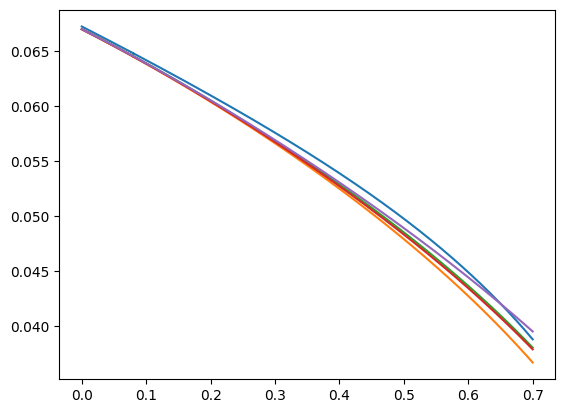

In [4]:
import matplotlib.pyplot as plt

n = 10000

z = jnp.linspace(0.0, 0.7, n)

a = 0.3 * jnp.ones_like(z)
r = a
b = 0.08 * jnp.ones_like(z)

phi1 = np.random.rand() * 2 * jnp.pi
phi2 = np.random.rand() * (2 * jnp.pi - phi1) + phi1

lims = jnp.array([phi1 * jnp.ones(n), phi2 * jnp.ones(n)])

nc = 5
c1 = np.random.rand(nc)
c2 = np.random.rand(nc)

%time f = integration.ellipse_arc_batch((c1, c2), a, b, z, lims)
plt.plot(z, f);

In [ ]:
c1 = jnp.array([0.5, 0.6])
c2 = jnp.array([0.3, 0.3])
c = jnp.vstack([c1, c2])

f = 1 - integration.ellipse_arc_batch(c, a, b, z, lims)

In [ ]:
import constant
a = 0.3
r = a
b = 0.08
z = 0.6

phi1 = np.random.rand() * 2 * jnp.pi
phi2 = np.random.rand() * (2 * jnp.pi - phi1) + phi1

print(quad(igv_const, phi1, phi2, args=(a, b, z))[0])
print(constant.G(a, b, z, phi1, phi2))

In [ ]:
a = 0.3
r = a
b = 0.08
z = 0.6

phi1 = np.random.rand() * 2 * jnp.pi
phi2 = np.random.rand() * (2 * jnp.pi - phi1) + phi1

print(quad(igv_circ_const, phi1, phi2, args=(r, z))[0])
print(constant.Gc(r, z, phi1, phi2))

In [ ]:
import quadratic 

a = 0.3
r = a
b = 0.08
z = 0.6

phi1 = np.random.rand() * 2 * jnp.pi
phi2 = np.random.rand() * (2 * jnp.pi - phi1) + phi1

print(quad(igv_circ_quad, phi1, phi2, args=(r, z))[0])
print(quadratic.Gc(r, z, phi1, phi2))

In [ ]:
a = 0.3
r = a
b = 0.08
z = 0.6

phi1 = np.random.rand() * 2 * jnp.pi
phi2 = np.random.rand() * (2 * jnp.pi - phi1) + phi1

print(quad(igv_quad, phi1, phi2, args=(a, b, z))[0])
print(quadratic.G(a, b, z, phi1, phi2))

In [ ]:
a = 0.3
r = a
b = 0.08
z = 0.6

phi1 = np.random.rand() * 2 * jnp.pi
phi2 = np.random.rand() * (2 * jnp.pi - phi1) + phi1

print(ellipse_arc_numerical(a, b, z, phi1, phi2))
print(circle_arc_numerical(r, z, phi1, phi2))

In [ ]:
%time integration.ellipse_arc((0.1, 0.2), a, b, z, (phi1, phi2))

In [ ]:
r = 0.3
z = 0.6

phi1 = np.random.rand() * 2 * jnp.pi
phi2 = np.random.rand() * (2 * jnp.pi - phi1) + phi1

%time circle_arc_numerical(r, z, phi1, phi2)

In [ ]:
# check complete circle and ellipse with 2d numerical integration 

a = 0.3
r = a
b = 0.2
z = 0.4

c1 = 0.2
c2 = 0.4

#integration.ellipse_arc_batch((c1, c2), a, b, z, lims)

in_ellipse = jax.vmap(jax.jit(lambda xy: xy[0]**2 / a**2 + (xy[1] - z)**2 / b**2 < 1))

@jax.jit
def intensity_func(xy, c1, c2): 

    x, y = xy
    mu = jnp.sqrt(1 - x**2 - y**2)
    return 1 - c1 * (1 - mu) - c2 * (1 - mu)**2

intensity = jax.vmap(intensity_func, in_axes=(0, None, None))

n = 1000
grid = jnp.meshgrid(jnp.linspace(-a, a, n), jnp.linspace(z - b, z + b, n))
coords = jnp.vstack([grid[0].flatten(), grid[1].flatten()]).T
%time jnp.sum(in_ellipse(coords) * intensity(coords, c1, c2)) * (4 * a * b) / (n * n)

In [ ]:
%time integration.ellipse_full((0.3, 0.3), a, b, z)

In [ ]:
jax.grad(integration.ellipse_full)((0.1, 0.2), a, b, z)

In [ ]:
jax.grad(integration.ell, argnums=(0, 1, 2, 3, 4))((c1, c2), a, b, z, (0.0, 2 * jnp.pi))